In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import RepeatedKFold
from keras.models import Sequential
from keras.layers import Dense
from itertools import product

In [6]:
df=pd.read_csv("Data Input.csv")
df.head()

,Drill Bit Diameter,Spindle Speed,Feed Rate,Entry,Exit
0,4,1000,100,1.025,1.070
1,4,1000,200,1.045,1.068
2,4,1000,300,1.073,1.055
3,4,3000,100,1.070,1.053
4,4,3000,200,1.073,1.080


In [7]:
df1=df.drop(['Exit'],axis=1)
X_Entry = df1.drop(['Entry'],axis=1)
Y_Entry = df1['Entry']


df2=df.drop(['Entry'],axis=1)
X_Exit = df2.drop(['Exit'],axis=1)
Y_Exit = df2['Exit']

In [8]:
#Dividing the data into test and train
X_entry_train, X_entry_test, y_entry_train, y_entry_test = train_test_split(X_Entry, Y_Entry, test_size=0.33)
X_exit_train, X_exit_test, y_exit_train, y_exit_test = train_test_split(X_Exit, Y_Exit, test_size=0.33)

In [5]:
#Polynomial regression
def polyreg(X,Y):
  X1 = sm.add_constant(X)
  model= sm.OLS(Y, X1).fit()
  print(model.summary())
  y_pred=model.predict(X1)
  print("Error is: {}".format(mean_squared_error(Y,y_pred)))
  X['Actual']=Y
  X['Predicted']=y_pred
  return X

In [6]:
reg_entry = polyreg(X_Entry,Y_Entry)

                            OLS Regression Results                            
Dep. Variable:                  Entry   R-squared:                       0.523
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     10.24
Date:                Sun, 27 Nov 2022   Prob (F-statistic):           0.000101
Time:                        08:59:08   Log-Likelihood:                 92.326
No. Observations:                  32   AIC:                            -176.7
Df Residuals:                      28   BIC:                            -170.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.0642      0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
reg_entry

In [7]:
reg_exit=polyreg(X_Exit,Y_Exit)
reg_exit

                            OLS Regression Results                            
Dep. Variable:                   Exit   R-squared:                       0.232
Model:                            OLS   Adj. R-squared:                  0.150
Method:                 Least Squares   F-statistic:                     2.824
Date:                Sun, 27 Nov 2022   Prob (F-statistic):             0.0568
Time:                        08:59:42   Log-Likelihood:                 91.015
No. Observations:                  32   AIC:                            -174.0
Df Residuals:                      28   BIC:                            -168.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.0704      0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,Drill Bit Diameter,Spindle Speed,Feed Rate,Actual,Predicted
0,4,1000,100,1.070,1.052559
1,4,1000,200,1.068,1.054392
2,4,1000,300,1.055,1.056226
3,4,3000,100,1.053,1.053559
4,4,3000,200,1.080,1.055392
5,4,3000,300,1.058,1.057226
6,4,5000,100,1.038,1.054559
7,4,5000,200,1.065,1.056392
8,4,5000,300,1.075,1.058226
9,6,1000,100,1.038,1.042448


In [3]:
def randomreg(X,Y):
  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33,random_state = 0)
  scaler = StandardScaler()
  scaler.fit(X_train)
  X_train = scaler.transform(X_train)
  X_test = scaler.transform(X_test)
  estimators = np.arange(10, 200, 10)
  scores = []
  for n in estimators:
    model = RandomForestRegressor(n_estimators = n).fit(X_train,y_train)
    scores.append(model.score(X_test, y_test))
  model = RandomForestRegressor(n_estimators = 200).fit(X_train,y_train)
  y_pred = model.predict(X)
  X['Actual']=Y
  X['Predicted']=y_pred

  plt.title("Effect of n_estimators")
  plt.xlabel("n_estimator")
  plt.ylabel("score")
  plt.plot(estimators, scores)
  print("Error is: {}".format(mean_squared_error(y_test,model.predict(X_test))))
  return model,X   



Error is: 0.00017768113651727595


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


,Drill Bit Diameter,Spindle Speed,Feed Rate,Actual,Predicted
0,4,1000,100,1.025,1.056185
1,4,1000,200,1.045,1.056185
2,4,1000,300,1.073,1.056185
3,4,3000,100,1.070,1.056185
4,4,3000,200,1.073,1.056185
5,4,3000,300,1.078,1.056185
6,4,5000,100,1.078,1.056185
7,4,5000,200,1.095,1.056185
8,4,5000,300,1.093,1.056185
9,6,1000,100,1.035,1.056185


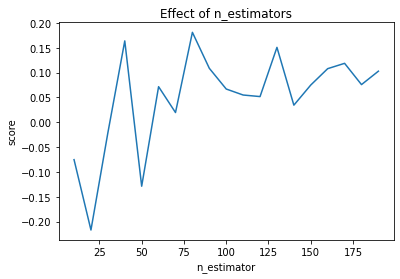

In [9]:
model_entry,random_entry=randomreg(X_Entry,Y_Entry)
random_entry

Error is: 0.00019799862139843578


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


,Drill Bit Diameter,Spindle Speed,Feed Rate,Actual,Predicted
0,4,1000,100,1.070,1.043395
1,4,1000,200,1.068,1.043395
2,4,1000,300,1.055,1.043395
3,4,3000,100,1.053,1.043395
4,4,3000,200,1.080,1.043395
5,4,3000,300,1.058,1.043395
6,4,5000,100,1.038,1.043395
7,4,5000,200,1.065,1.043395
8,4,5000,300,1.075,1.043395
9,6,1000,100,1.038,1.043395


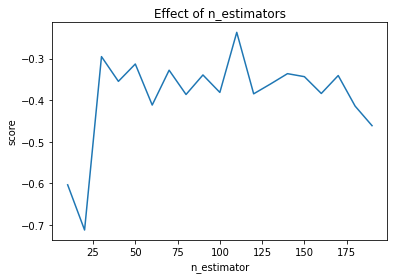

In [10]:
model_exit,random_exit=randomreg(X_Exit,Y_Exit)
random_exit

In [11]:
def gbtree(X,Y):
  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33,random_state = 0)
  params={'n_estimators':3,'max_depth':3,'learning_rate':1,'criterion':'mse'}
  model = GradientBoostingRegressor(**params).fit(X_train,y_train)
  y_pred = model.predict(X)
  X['Actual']=Y
  X['Predicted']=y_pred
  print("Error is: {}".format(mean_squared_error(y_test,model.predict(X_test))))
  return X

In [ ]:
gbt_entry=gbtree(X_Entry,Y_Entry)
gbt_entry

Error is: 2.160185540262602e-05


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:475: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


,Drill Bit Diameter,Spindle Speed,Feed Rate,Actual,Predicted
0,4,1000,100,1.025,1.025176
1,4,1000,200,1.045,1.044689
2,4,1000,300,1.073,1.071500
3,4,3000,100,1.070,1.071500
4,4,3000,200,1.073,1.071500
5,4,3000,300,1.078,1.078000
6,4,5000,100,1.078,1.078000
7,4,5000,200,1.095,1.095000
8,4,5000,300,1.093,1.093000
9,6,1000,100,1.035,1.035148


In [12]:
gbt_exit=gbtree(X_Exit,Y_Exit)
gbt_exit

Error is: 2.1958851576252526e-05


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:475: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


,Drill Bit Diameter,Spindle Speed,Feed Rate,Actual,Predicted
0,4,1000,100,1.070,1.069574
1,4,1000,200,1.068,1.066625
2,4,1000,300,1.055,1.057292
3,4,3000,100,1.053,1.053408
4,4,3000,200,1.080,1.080000
5,4,3000,300,1.058,1.057292
6,4,5000,100,1.038,1.037936
7,4,5000,200,1.065,1.066625
8,4,5000,300,1.075,1.075000
9,6,1000,100,1.038,1.037936


In [13]:
def adareg(X,Y):
  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33,random_state = 0)
  model = AdaBoostRegressor().fit(X_train,y_train)
  y_pred = model.predict(X)
  X['Actual']=Y
  X['Predicted']=y_pred
  print("Error is: {}".format(mean_squared_error(y_test,model.predict(X_test))))
  return X

In [14]:
ada_entry=adareg(X_Entry,Y_Entry)
ada_entry

Error is: 4.541048237477102e-06


,Drill Bit Diameter,Spindle Speed,Feed Rate,Actual,Predicted
0,4,1000,100,1.025,1.025000
1,4,1000,200,1.045,1.045000
2,4,1000,300,1.073,1.073000
3,4,3000,100,1.070,1.070000
4,4,3000,200,1.073,1.073000
5,4,3000,300,1.078,1.076750
6,4,5000,100,1.078,1.075500
7,4,5000,200,1.095,1.095000
8,4,5000,300,1.093,1.093000
9,6,1000,100,1.035,1.034200


In [15]:
ada_exit=adareg(X_Exit,Y_Exit)
ada_exit

Error is: 1.4636994949495193e-05


,Drill Bit Diameter,Spindle Speed,Feed Rate,Actual,Predicted
0,4,1000,100,1.070,1.068600
1,4,1000,200,1.068,1.067571
2,4,1000,300,1.055,1.058000
3,4,3000,100,1.053,1.052250
4,4,3000,200,1.080,1.079000
5,4,3000,300,1.058,1.058000
6,4,5000,100,1.038,1.038000
7,4,5000,200,1.065,1.066000
8,4,5000,300,1.075,1.075000
9,6,1000,100,1.038,1.037000


In [16]:
def get_model(n_inputs, n_outputs):
	model = Sequential()
	model.add(Dense(n_inputs/2, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
	model.add(Dense(n_outputs))
	model.compile(loss='mae', optimizer='adam',metrics=['accuracy'])
	return model

def evaluate_model(X, y,nsplits,nrepeats,epochs):
	results = list()
	
	if y.ndim==1:
		n_inputs, n_outputs = X.shape[1], 1
	else:
		n_inputs, n_outputs = X.shape[1], y.shape[1]
	# define evaluation procedure
	cv = RepeatedKFold(n_splits=nsplits, n_repeats=nrepeats, random_state=1)
	# enumerate folds
	for train_ix, test_ix in cv.split(X):
		X_train, X_test = X[train_ix], X[test_ix]
		y_train, y_test = y[train_ix], y[test_ix]
		model = get_model(n_inputs, n_outputs)
		model_fin=model.fit(X_train, y_train, epochs=epochs, batch_size=1, validation_data=(X_test, y_test))
		#print('>%.3f' % mae)
	#Create plot
	loss_train = model_fin.history['loss']
	loss_val = model_fin.history['val_loss']
	epochs = range(1,epochs+1)
	plt.plot(epochs, loss_train, 'g', label='Training loss')
	plt.plot(epochs, loss_val, 'b', label='validation loss')
	plt.title('Training and Validation loss')
	plt.xlabel('Epochs')
	plt.ylabel('Loss')
	plt.legend()
	plt.show()

	pred=model.predict(X_test)
	return model,pred,y_test

In [17]:
X=np.array(df.drop(['Entry','Exit'],axis=1))
Y=np.array(df[['Entry','Exit']])
evaluate_model(X,Y,4,3,100)

Epoch 1/100
24/24 [==============================] - 1s 8ms/step - loss: 1.0382 - accuracy: 0.6250 - val_loss: 1.0182 - val_accuracy: 0.6250
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 1.0142 - accuracy: 0.6250 - val_loss: 0.9943 - val_accuracy: 0.6250
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.9902 - accuracy: 0.6250 - val_loss: 0.9703 - val_accuracy: 0.6250
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.9662 - accuracy: 0.6250 - val_loss: 0.9463 - val_accuracy: 0.6250
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.9422 - accuracy: 0.6250 - val_loss: 0.9223 - val_accuracy: 0.6250
Epoch 6/100
24/24 [==============================] - 0s 3ms/step - loss: 0.9182 - accuracy: 0.6250 - val_loss: 0.8982 - val_accuracy: 0.6250
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.8942 - accuracy: 0.6250 - val_loss: 0.8742 - val_accuracy: 0.6250
Epoch 8/100
2

KeyboardInterrupt: ignored

In [20]:
def expand_grid(dictionary):
   return pd.DataFrame([row for row in product(*dictionary.values())], 
                       columns=dictionary.keys())
   
dictionary = {'Drill Bit Diameter': np.linspace(6,7,100), 
              'Spindle Speed': np.linspace(3600,3700,200), 
              'Feed Rate': np.linspace(160,170,100)}

new_testdf=expand_grid(dictionary)

In [21]:
y_pred_entry=model_entry.predict(new_testdf)
y_pred_exit=model_exit.predict(new_testdf)
new_testdf['Entry_Predictions']=y_pred_entry
new_testdf['Exit_Predictions']=y_pred_exit
(new_testdf.sort_values("Entry_Predictions",ascending=True)).head()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


,Drill Bit Diameter,Spindle Speed,Feed Rate,Entry_Predictions,Exit_Predictions
0,6.000000,3600.000000,160.000000,1.056185,1.043395
1333340,6.666667,3666.834171,164.040404,1.056185,1.043395
1333339,6.666667,3666.834171,163.939394,1.056185,1.043395
1333338,6.666667,3666.834171,163.838384,1.056185,1.043395
1333337,6.666667,3666.834171,163.737374,1.056185,1.043395


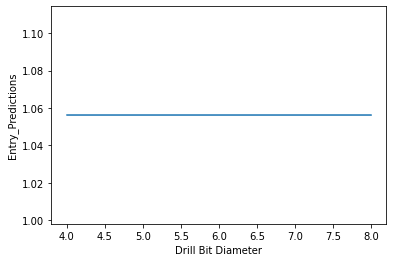

In [19]:
import seaborn as sns
sns.lineplot(x="Drill Bit Diameter",y="Entry_Predictions",data=new_testdf)

In [17]:
(new_testdf.sort_values("Exit_Predictions",ascending=True)).head()

,Drill Bit Diameter,Spindle Speed,Feed Rate,Entry_Predictions,Exit_Predictions
0,4.000000,1000.000000,100.000000,1.056185,1.043395
9999993,6.666667,3669.338677,162.207358,1.056185,1.043395
9999994,6.666667,3669.338677,162.876254,1.056185,1.043395
9999995,6.666667,3669.338677,163.545151,1.056185,1.043395
9999996,6.666667,3669.338677,164.214047,1.056185,1.043395
